# Monte Carlo Simulations with the Efficient Frontier

### Summary of Efficient Frontier
The Efficient fronter is a set of optimal portfolios that offer the highest expected return for a defined level of risk. It provides a great visualization on how to choose an optimal portfolio mathematically. _*Risk is defined as the assests actual return differing from our expected return.*_

"The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk." - Investopedia

# <center>Founder: Harry Markowitz</center>                                               
![image info](Harry_Markowitz.jfif)


Harry Markowitz introduced the efficient frontier theory in 1952 and later won a Nobel Memorial Prize in economics for the Modern Portfolio Theory in 1990. This theory is widely taught in every introductory Financial Course throughout the United States. His theory is written in detail in a paper: *Portfolio Selection* (1952).



# Summary

I will simulate weights on individual companies within a given portfolio to obtain an understanding on what return to risk is desired by the individual.

I picked 10 or so companies that are spread out in their corresponding Industries such that we have a relatively "low" correlation with each other.

# Companies
### Google | NVIDIA | Facebook 
### Wells Fargo | Pfizer | COKE  
### Disney | IMAX | Catepillar
### Southwest Airlines


In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np

# Obtaining the Data

### Companies of Interest (with their associated ticker)

| Technology | Finance | Health | Consumer | Entertainment | Industrials | Transportation |
| --- | --- | --- |--- | --- | --- | --- |
| (GOOG) Google | (WFC) Wells Fargo | (PFE) Pfizer | (COKE) Coke |(DIS) Disney | (CAT) Catepillar |(LUV) Southwest Airlines|
| (NVDA) NVIDIA | --- | --- | --- | (IMAX) IMAX | --- | --- |
| (FB) Facebook | --- | --- | --- | --- | --- | --- |

In [2]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.
import pandas_datareader as pdr
from datetime import datetime


def get_historical_Data(tickers):
    """
    This function returns a pd dataframe with all of the adjusted closing information
    """
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data,pdr.get_data_yahoo(symbols=i, start=datetime(2013, 10, 11), end=datetime(2022, 11, 19)).iloc[:,5]], axis = 1)
        names.append(i)
    data.columns = names
    return data

#    The ticker names of the companies that we will be looking at.
ticks = ["GOOG", "NVDA", "Meta", "WFC","DIS", "IMAX", "LUV", "PFE", "COKE", "CAT"]
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

(2294, 10)


,GOOG,NVDA,Meta,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2022-11-14 00:00:00,96.029999,162.949997,114.220001,46.869999,94.279999,14.81,37.750000,49.240002,455.489990,236.500000
2022-11-15 00:00:00,98.720001,166.660004,117.080002,46.709999,95.510002,15.38,38.639999,48.570000,465.950012,234.589996
2022-11-16 00:00:00,98.989998,159.100006,113.230003,46.209999,93.949997,14.85,37.990002,48.049999,461.700012,232.419998
2022-11-17 00:00:00,NaN,156.770004,111.449997,45.990002,91.449997,14.77,37.630001,48.330002,462.929993,230.440002
2022-11-18 00:00:00,97.800003,154.089996,112.050003,46.500000,91.800003,15.04,38.110001,48.230000,466.440002,231.429993


In [3]:
# Saving the most recent year data such that we can compare...
# Called dT (DataTest)
dT = d.iloc[d.shape[0] - 252:,:] # Data test

# Update the "Training" or "data full"
d = d.iloc[:d.shape[0] - 252,:] # Data Train for the Simulation

print("Testing Data dimensions: ", dT.shape)
print("Training Data dimensions:", d.shape)

Testing Data dimensions:  (252, 10)
Training Data dimensions: (2042, 10)


In [4]:
dT # Test

,GOOG,NVDA,Meta,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2021-11-19,149.952499,329.585815,345.299988,47.699913,154.000000,18.299999,46.830002,49.202099,558.562256,195.836563
2021-11-22,147.078506,319.304047,341.010010,49.185040,154.160004,18.570000,47.720001,49.589512,578.851929,197.732025
2021-11-23,146.757004,317.205688,337.250000,50.220722,151.029999,18.190001,46.980000,49.473293,588.832275,200.614258
2021-11-24,146.717499,326.478271,341.059998,50.132782,151.339996,18.440001,46.990002,49.289268,594.830322,202.314301
2021-11-26,142.806000,314.777679,333.119995,47.318859,148.110001,17.170000,44.959999,52.301445,595.918152,194.165833
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,96.029999,162.949997,114.220001,46.869999,94.279999,14.810000,37.750000,49.240002,455.489990,236.500000
2022-11-15,98.720001,166.660004,117.080002,46.709999,95.510002,15.380000,38.639999,48.570000,465.950012,234.589996
2022-11-16,98.989998,159.100006,113.230003,46.209999,93.949997,14.850000,37.990002,48.049999,461.700012,232.419998
2022-11-17,NaN,156.770004,111.449997,45.990002,91.449997,14.770000,37.630001,48.330002,462.929993,230.440002


In [5]:
d # Train

,GOOG,NVDA,Meta,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2013-10-11,21.718344,3.582325,49.110001,31.782213,60.191036,26.459999,14.317806,19.535116,58.690723,65.756989
2013-10-14,21.820959,3.636318,49.509998,32.027691,60.754681,26.850000,14.393014,19.963638,58.614964,66.240883
2013-10-15,21.967909,3.617537,49.500000,31.866583,60.400131,26.389999,14.289600,19.834396,58.690723,65.864532
2013-10-16,22.366913,3.662141,51.139999,32.380566,60.318317,26.700001,14.665643,20.269722,59.296753,66.263947
2013-10-17,22.136776,3.669183,52.209999,32.741131,60.381939,26.660000,15.051085,20.582621,60.092163,66.403137
...,...,...,...,...,...,...,...,...,...,...
2021-11-12,149.645493,303.656555,340.890015,49.790813,159.630005,20.320000,48.419998,48.165752,509.878815,204.463776
2021-11-15,149.388000,300.009521,347.559998,49.908062,158.429993,19.920000,49.130001,48.088268,510.996613,202.939590
2021-11-16,149.076004,301.788086,342.959991,49.214348,158.830002,19.959999,47.599998,48.039845,517.324036,200.711945
2021-11-17,149.061996,292.375610,340.769989,48.696510,157.330002,18.799999,47.400002,49.269894,524.958862,198.318237


# Understanding Returns

In [6]:
from scipy import stats
expected_returns_a = d.pct_change() # Daily returns from trading day to day...
expected_returns_a.columns = ticks # Setting the Column names 
expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*250) # Annualizing the average rate of return
expected_returns_aA = expected_returns_aA.T # Transpose the values 

dar = d.pct_change().iloc[1:,:]+1 # dar = portfolio returns for each period (in this case day to day)
# 6 is the number of years I am working with (Note: Remember that earlier I've took out a year for training purposes.)
gar = pd.DataFrame(np.prod(dar)**(1/float(6)) - 1) # Geometric Average Rate of Return
# print(gar)
full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))
# DO NOTE that Arithmetic Average Return is not usually an appropriate method
# for calculating the average return and telling others...

# Example: Returns are the following (50%, 30%, -50%) on a yearly basis (jan 1st to dec 31st)
# Average: (50 + 30 - 50) / 3 = 10% average rate of return. This is not a great "representation of how well you done"
# Example
# Start with initial value of $ 100 Dollars: 
# First year becomes 150. 
# Second Year becomes 190. 
# Third year becomes 97.5. You LOST money.

# Geometric Average: (also known as the Compounded annual growth rate)
# Using the example from above...
# ((1+ 0.5) * (1 + 0.3) * (0.5))^(1/3) - 1
# ((1.5)*(1.3)*(0.5))^(1/3) - 1
# .9916 - 1
# -0.0084
# or (-0.84) % average ANNUAL rate of return (more accurate gauge as to how well you've done.)

full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
print("Expected Annual Returns ", expected_returns_aA)
print("dar", dar)
print("Full Annual Return", full_return_annual)

Expected Annual Returns         GOOG      NVDA      Meta       WFC       DIS      IMAX       LUV  \
0  0.271023  0.639422  0.288312  0.096578  0.148664  0.053968  0.202742   

        PFE      COKE      CAT  
0  0.137089  0.335643  0.17512  
dar                 GOOG      NVDA      Meta       WFC       DIS      IMAX  \
2013-10-14  1.004725  1.015072  1.008145  1.007724  1.009364  1.014739   
2013-10-15  1.006734  0.994835  0.999798  0.994970  0.994164  0.982868   
2013-10-16  1.018163  1.012330  1.033131  1.016129  0.998645  1.011747   
2013-10-17  0.989711  1.001923  1.020923  1.011135  1.001055  0.998502   
2013-10-18  1.137963  1.011516  1.038498  1.000000  1.010991  0.994749   
...              ...       ...       ...       ...       ...       ...   
2021-11-12  1.019745  1.000000  1.040123  1.007314  0.984702  0.979277   
2021-11-15  0.998279  0.987990  1.019566  1.002355  0.992483  0.980315   
2021-11-16  0.997912  1.005928  0.986765  0.986100  1.002525  1.002008   
2021-11-17  0.

# Equations Utilized

## Measuring the Adjusted Risk of Return
Measures the risk adjusted rate of return of a portfolio.
$$
\begin{aligned}
Sharpe Ratio = \frac{R_p - R_f}{\sigma_p}
\end{aligned}
$$
$\sigma_p$ = Standard Deviation of Portfolio \
$R_p$ = Return of Portfolio \
$R_f$ = Return of Risk Free Instrument
\
Rule of Thumb: 
Sharpe Ratio < 1 sub-optimal... There is most likely a better option \
Sharpe Ratio > 1 is acceptable \
Sharpe Ratio > 2 is VERY good \
Sharpe Ratio > 3 is EXCELLENT! 

# Volatility
$$
\begin{aligned}
\sum_{i=0}^N \sum_{j=0}^N {\sigma_{ij}}{X_i X}
\end{aligned}
$$
$X$ = Weights in Portfolio \
$\sigma_{ij}$ = Variance - Covariance Matrix

# Expected Return
$$
\begin{aligned}
\sum_{i=0}^N X_i \mu_i
\end{aligned}
$$
\
$X$ = Weights in Porfolio \
$\mu_i$ = Arithmetic Average Rate of Return for $i^{th}$ security

In [7]:
# Storing lists that retain returns, volatility, and weights of the Simulated portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# This is what is going to be randomized
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(ticks)
# Number of simulated iterations
num_portfolios = 100000

# Getting the covariance matrix
# Gets a percentage change one day to the next
daily_returns = d.pct_change()
# Converting daily returns to annual returns (standardizing to a year)
annual_returns = (daily_returns.mean() * 250) + 1

# Obtaining the covariance of annual
cov_daily = daily_returns.cov() # Covariance
cov_annual = cov_daily*250 # Covariance Annualized

print(annual_returns)

GOOG    1.271023
NVDA    1.639422
Meta    1.288312
WFC     1.096578
DIS     1.148664
IMAX    1.053968
LUV     1.202742
PFE     1.137089
COKE    1.335643
CAT     1.175120
dtype: float64


In [8]:
# Setting seed of interpretability
np.random.seed(3)
# Filling in the lists with a simulated return, risk, and a given weight
# num_portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= np.sum(weights)
    returns = (np.dot(weights, (annual_returns)))
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    """
    sharpe ratio: This calculates the risk adjusted return
    It suggests that adding assets to a portfolio that have low correlation can decrease portfolio risk without 
    sacrificing return 
    """
    sharpe = ((returns-1) / volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)


In [9]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,GOOG Weight,NVDA Weight,Meta Weight,WFC Weight,DIS Weight,IMAX Weight,LUV Weight,PFE Weight,COKE Weight,CAT Weight
0,0.227753,0.218307,1.043272,0.117817,0.151475,0.062225,0.109267,0.191004,0.191719,0.026863,0.044330,0.011009,0.094290
1,0.225424,0.202100,1.115404,0.007585,0.115987,0.164814,0.070706,0.171697,0.150017,0.006089,0.141890,0.065823,0.105392
2,0.246655,0.212138,1.162706,0.059669,0.145874,0.092695,0.033013,0.114624,0.164221,0.064476,0.046712,0.081650,0.197066
3,0.259013,0.203932,1.270092,0.172284,0.118690,0.159369,0.149293,0.066724,0.016278,0.115341,0.098471,0.063824,0.039727
4,0.220551,0.212148,1.039607,0.093302,0.107628,0.061793,0.066970,0.105045,0.197504,0.134553,0.065064,0.063799,0.104342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.231291,0.208336,1.110180,0.023417,0.100606,0.149373,0.154120,0.074488,0.159411,0.057221,0.058428,0.151602,0.071334
99996,0.200585,0.198756,1.009201,0.038546,0.042940,0.052623,0.041529,0.091245,0.162005,0.171378,0.167278,0.142067,0.090388
99997,0.258528,0.207259,1.247366,0.034737,0.173086,0.129049,0.129066,0.000071,0.106695,0.022480,0.137896,0.079701,0.187218
99998,0.244291,0.206224,1.184591,0.139549,0.107646,0.161297,0.101648,0.067403,0.157787,0.046113,0.080258,0.113453,0.024847


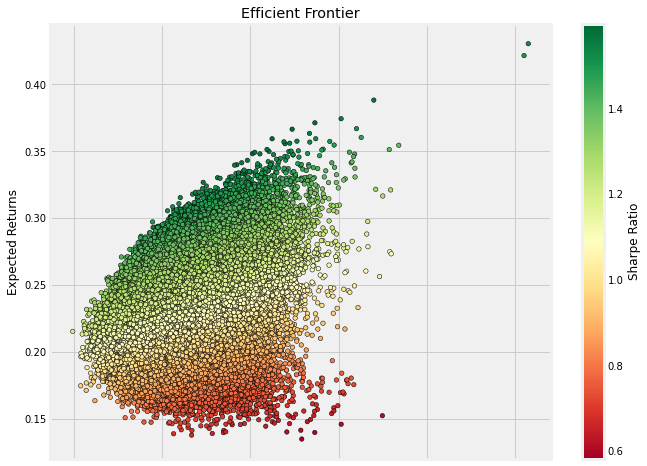

In [10]:
# PLotting the efficient frontier.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

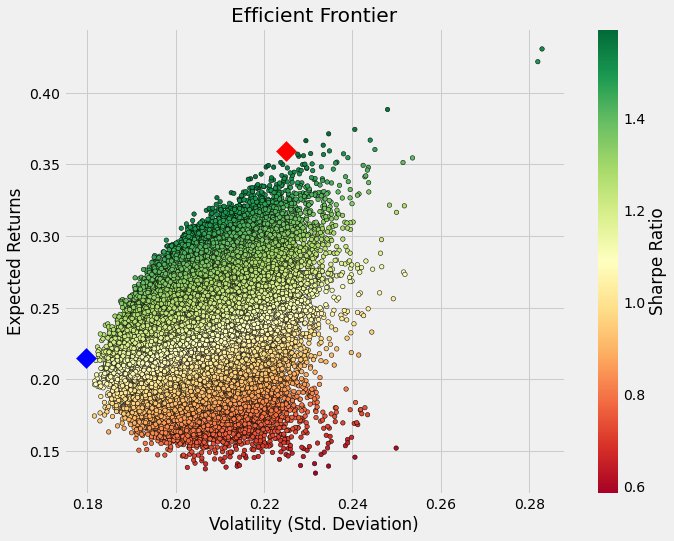

In [11]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [12]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
print(r_ef)

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.215249                  0.359370
Volatility                        0.179774                  0.224917
Sharpe Ratio                      1.197330                  1.597790
GOOG Weight                       0.209187                  0.130329
NVDA Weight                       0.033875                  0.280374
Meta Weight                       0.009148                  0.127805
WFC Weight                        0.071051                  0.014557
DIS Weight                        0.095412                  0.023350
IMAX Weight                       0.015528                  0.003293
LUV Weight                        0.005229                  0.035800
PFE Weight                        0.335151                  0.090082
COKE Weight                       0.161293                  0.197502
CAT Weight                        0.064126                  0.096908


# If I were to invest 1,000 USD last year... what would I have now?

In [13]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dT.index[0],"| I would have...")
actual_return = (dT.iloc[dT.shape[0]-1,:] - dT.iloc[0,:]) / ( dT.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dT.iloc[0,:])
end_price = dT.iloc[dT.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")


----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                   1215.248944               1359.370049

----------------------------------------------------------------
If I invested 1000 USD on | 2021-11-19 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  837.4

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  685.26



In [14]:
# Other models to take a look at...
# That try to predict a securities rate of return
# CAPM
# CCAPM
# ICAPM
# Fama French 3 factor, 4 factor, and 5 factor model.